In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re
import numpy as np 
import pandas as pd
import math

from pymatgen.core import Structure, PeriodicSite

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ch4_sigma , ch4_epsilon = 3.73, 148

In [28]:
threshold = 6

In [5]:
structure_list = ['ABEFUL_clean']

In [6]:
# Need modification later!!
for structure in structure_list:
    structure = structure 

# Data preparation

## Get supercell

In [7]:
def get_supercell(structure):
    with open("nvt_results/%s/simulation.input" %structure, "r") as f_input:
        for line in f_input:
            if re.search("UnitCells", line):
                s1, s2, s3 = line.split()[1], line.split()[2], line.split()[3]
    supercell = [int(s1), int(s2), int(s3)]
    return supercell

In [8]:
sc = get_supercell(structure)

In [9]:
sc

[2, 2, 3]

## Read force field

### Read ff with LB mixing rule

In [10]:
uff = pd.read_csv("ff_data/uff.csv")

In [11]:
uff

,Unnamed: 0,element,epsilon,sigma,lb_sigma,lb_epsilon
0,0,Ac,16.6080,3.0985,3.399618,82.30400
1,1,Ag,18.1178,2.8045,3.234314,83.05890
2,2,Al,254.1520,4.0082,3.866599,201.07600
3,3,Am,7.0458,3.0121,3.351885,77.52290
4,4,Ar,93.1052,3.4460,3.585189,120.55260
...,...,...,...,...,...,...
98,98,Xe,167.0861,3.9235,3.825527,157.54305
99,99,Y,36.2355,2.9801,3.334033,92.11775
100,100,Yb,114.7458,2.9890,3.339007,131.37290
101,101,Zn,62.4056,2.4616,3.030143,105.20280


## Get gas sites

In [12]:
sp_cry = Structure.from_file("nvt_results/%s/Movies/System_0/Framework_0_final_%s_%s_%s_P1.cif" %(structure, sc[0], sc[1], sc[2]))

/home/xiaoqi/anaconda3/envs/ml/lib/python3.7/site-packages/pymatgen/io/cif.py:673: UserWarning: A 1-line symmetry op P1 CIF is detected!
  warnings.warn(msg)
/home/xiaoqi/anaconda3/envs/ml/lib/python3.7/site-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
A 1-line symmetry op P1 CIF is detected!
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


In [13]:
un_cry = Structure.from_file("nvt_results/%s/%s.cif" %(structure, structure))


In [14]:
def assign_sigma_epsilon(py_struc, uff):
    site_sigma = [uff.loc[uff["element"] == site.specie.symbol]["lb_sigma"].values for site in py_struc.sites]
    site_epsilon = [uff.loc[uff["element"] == site.specie.symbol]["lb_epsilon"].values for site in py_struc.sites]
    for i in range(len(py_struc.sites)):
        py_struc.sites[i].properties = {"lb_sigma": site_sigma[i], "lb_epsilon": site_epsilon[i], "weight": []}

    return py_struc


In [15]:
assign_sigma_epsilon(un_cry, uff)

Structure Summary
Lattice
    abc : 15.3873 15.3873 9.8379
 angles : 90.0 90.0 90.0
 volume : 2329.309757790891
      A : 15.3873 0.0 9.422003846260033e-16
      B : 2.4744665647369306e-15 15.3873 9.422003846260033e-16
      C : 0.0 0.0 9.8379
PeriodicSite: Tb (7.6937, 7.6936, 2.4595) [0.5000, 0.5000, 0.2500]
PeriodicSite: Tb (7.6937, 7.6936, 7.3784) [0.5000, 0.5000, 0.7500]
PeriodicSite: H (6.3334, 4.0422, 2.0069) [0.4116, 0.2627, 0.2040]
PeriodicSite: H (4.4254, 2.7420, 2.0069) [0.2876, 0.1782, 0.2040]
PeriodicSite: H (9.0539, 11.3451, 2.0069) [0.5884, 0.7373, 0.2040]
PeriodicSite: H (10.9619, 12.6453, 2.0069) [0.7124, 0.8218, 0.2040]
PeriodicSite: H (11.3451, 6.3334, 2.0069) [0.7373, 0.4116, 0.2040]
PeriodicSite: H (12.6453, 4.4254, 2.0069) [0.8218, 0.2876, 0.2040]
PeriodicSite: H (4.0422, 9.0539, 2.0069) [0.2627, 0.5884, 0.2040]
PeriodicSite: H (2.7420, 10.9619, 2.0069) [0.1782, 0.7124, 0.2040]
PeriodicSite: H (9.0539, 4.0422, 2.9120) [0.5884, 0.2627, 0.2960]
PeriodicSite: H (10.96

In [16]:
assign_sigma_epsilon(sp_cry, uff)

Structure Summary
Lattice
    abc : 30.7746 30.7746 29.5137
 angles : 90.0 90.0 90.0
 volume : 27951.717093490694
      A : 30.7746 0.0 1.8844007692520067e-15
      B : 4.948933129473861e-15 30.7746 1.8844007692520067e-15
      C : 0.0 0.0 29.5137
PeriodicSite: Tb (7.6937, 7.6936, 2.4595) [0.2500, 0.2500, 0.0833]
PeriodicSite: Tb (7.6937, 7.6936, 7.3784) [0.2500, 0.2500, 0.2500]
PeriodicSite: Tb (7.6937, 7.6936, 12.2974) [0.2500, 0.2500, 0.4167]
PeriodicSite: Tb (7.6937, 7.6936, 17.2163) [0.2500, 0.2500, 0.5833]
PeriodicSite: Tb (7.6937, 7.6936, 22.1353) [0.2500, 0.2500, 0.7500]
PeriodicSite: Tb (7.6937, 7.6936, 27.0542) [0.2500, 0.2500, 0.9167]
PeriodicSite: Tb (7.6937, 23.0810, 2.4595) [0.2500, 0.7500, 0.0833]
PeriodicSite: Tb (7.6937, 23.0810, 7.3784) [0.2500, 0.7500, 0.2500]
PeriodicSite: Tb (7.6937, 23.0810, 12.2974) [0.2500, 0.7500, 0.4167]
PeriodicSite: Tb (7.6937, 23.0810, 17.2163) [0.2500, 0.7500, 0.5833]
PeriodicSite: Tb (7.6937, 23.0810, 22.1353) [0.2500, 0.7500, 0.7500]
Per

In [16]:
assign_sigma_epsilon(sp_cry, uff)

Structure Summary
Lattice
    abc : 15.3873 15.3873 9.8379
 angles : 90.0 90.0 90.0
 volume : 2329.309757790891
      A : 15.3873 0.0 9.422003846260033e-16
      B : 2.4744665647369306e-15 15.3873 9.422003846260033e-16
      C : 0.0 0.0 9.8379
PeriodicSite: Tb (3.8468, 3.8468, 0.8198) [0.2500, 0.2500, 0.0833]
PeriodicSite: Tb (3.8468, 3.8468, 2.4595) [0.2500, 0.2500, 0.2500]
PeriodicSite: Tb (3.8468, 3.8468, 4.0991) [0.2500, 0.2500, 0.4167]
PeriodicSite: Tb (3.8468, 3.8468, 5.7388) [0.2500, 0.2500, 0.5833]
PeriodicSite: Tb (3.8468, 3.8468, 7.3784) [0.2500, 0.2500, 0.7500]
PeriodicSite: Tb (3.8468, 3.8468, 9.0181) [0.2500, 0.2500, 0.9167]
PeriodicSite: Tb (3.8468, 11.5405, 0.8198) [0.2500, 0.7500, 0.0833]
PeriodicSite: Tb (3.8468, 11.5405, 2.4595) [0.2500, 0.7500, 0.2500]
PeriodicSite: Tb (3.8468, 11.5405, 4.0991) [0.2500, 0.7500, 0.4167]
PeriodicSite: Tb (3.8468, 11.5405, 5.7388) [0.2500, 0.7500, 0.5833]
PeriodicSite: Tb (3.8468, 11.5405, 7.3784) [0.2500, 0.7500, 0.7500]
PeriodicSite: 

### Read molecule movies and get the fractional coordinates in the unit cell

In [17]:
with open("nvt_results/%s/Movies/System_0/Movie_%s_%d.%d.%d_298.000000_0.000000_allcomponents.pdb" %(structure, structure, sc[0], sc[1], sc[2])) as file:
    data = file.readlines()
    atom_pos = np.array([np.array([float(i) for i in line.split()[4:7]]) for line in data if "ATOM" in line])

In [18]:
atom_pos[4]

array([15.401, 22.472, 27.173])

### map the gas molecule coordinates to unit cell

In [20]:
def convert(positions, pyg_struc):
    abc = [pyg_struc.lattice.a, pyg_struc.lattice.b, pyg_struc.lattice.c]
    for pos in positions:
        for i in range(3):
            pos[i] = pos[i] - pos[i] // abc[i] * abc[i]
    return positions
        

In [22]:
atom_pos[4]

array([0.0137, 7.0847, 7.4972])

In [31]:
len(un_cry.sites)

178

In [29]:
un_cry.get_sites_in_sphere(pt=atom_pos[4], r=threshold)

[PeriodicSite: O (11.4994, 21.7032, 24.5948) [0.7473, 1.4105, 2.5000],
 PeriodicSite: N (14.9272, 17.3830, 24.5948) [0.9701, 1.1297, 2.5000],
 PeriodicSite: C (15.0688, 19.6557, 24.5948) [0.9793, 1.2774, 2.5000],
 PeriodicSite: C (13.7593, 19.3572, 24.5948) [0.8942, 1.2580, 2.5000],
 PeriodicSite: C (13.6532, 17.9170, 24.5948) [0.8873, 1.1644, 2.5000],
 PeriodicSite: H (13.0546, 19.9635, 24.5948) [0.8484, 1.2974, 2.5000],
 PeriodicSite: C (13.5731, 18.3340, 29.5137) [0.8821, 1.1915, 3.0000],
 PeriodicSite: C (12.7715, 19.5957, 29.5137) [0.8300, 1.2735, 3.0000],
 PeriodicSite: C (11.2558, 21.9269, 29.5137) [0.7315, 1.4250, 3.0000],
 PeriodicSite: C (14.9565, 18.4355, 29.5137) [0.9720, 1.1981, 3.0000],
 PeriodicSite: C (12.3840, 20.1923, 30.7129) [0.8048, 1.3123, 3.1219],
 PeriodicSite: C (11.6173, 21.3417, 30.7159) [0.7550, 1.3870, 3.1222],
 PeriodicSite: H (15.3442, 20.5128, 29.5137) [0.9972, 1.3331, 3.0000],
 PeriodicSite: H (12.6453, 19.8127, 31.5206) [0.8218, 1.2876, 3.2040],
 Perio

In [30]:
sp_cry.get_sites_in_sphere(pt=atom_pos[4], r=threshold)

[PeriodicSite: O (11.4994, 21.7032, 24.5947) [0.3737, 0.7052, 0.8333],
 PeriodicSite: N (14.9272, 17.3830, 24.5947) [0.4850, 0.5648, 0.8333],
 PeriodicSite: C (15.0688, 19.6557, 24.5947) [0.4896, 0.6387, 0.8333],
 PeriodicSite: C (13.7593, 19.3572, 24.5947) [0.4471, 0.6290, 0.8333],
 PeriodicSite: C (13.6532, 17.9170, 24.5947) [0.4436, 0.5822, 0.8333],
 PeriodicSite: H (13.0546, 19.9635, 24.5947) [0.4242, 0.6487, 0.8333],
 PeriodicSite: C (11.2558, 21.9269, 29.5137) [0.3658, 0.7125, 1.0000],
 PeriodicSite: C (14.9565, 18.4355, 29.5137) [0.4860, 0.5990, 1.0000],
 PeriodicSite: C (12.3840, 20.1923, 30.7129) [0.4024, 0.6561, 1.0406],
 PeriodicSite: C (11.6173, 21.3417, 30.7159) [0.3775, 0.6935, 1.0407],
 PeriodicSite: H (12.6453, 19.8127, 31.5206) [0.4109, 0.6438, 1.0680],
 PeriodicSite: H (11.3451, 21.7207, 31.5206) [0.3686, 0.7058, 1.0680],
 PeriodicSite: C (12.3840, 20.1923, 28.3145) [0.4024, 0.6561, 0.9594],
 PeriodicSite: C (11.6173, 21.3417, 28.3115) [0.3775, 0.6935, 0.9593],
 Perio

In [14]:
# Get atoms in threshold sphere
threshold = 12
sphere_sites = np.array([[site for site in un_cry.get_sites_in_sphere(pt=pos, r=threshold)] for pos in atom_pos], dtype=object)

In [17]:
# Calculate distance between gas and surrounding framework atoms
dist = np.array([np.array([site.distance_from_point(atom_pos[idx]) for site in sphere_sites[idx]]) 
                    for idx in range(len(atom_pos))], dtype=object)

In [18]:
# Calculate LJ potential

def lj(sigma_lb, epsilon_lb, distance):
    #distance_reduced = distance/sigma_lb
    u_lj = 4 * epsilon_lb * ((sigma_lb/distance)**12 - (sigma_lb/distance)**6)
    return u_lj

potential = np.array([np.array([lj(sphere_sites[i][j].properties["lb_sigma"], sphere_sites[i][j].properties["lb_epsilon"], dist[i][j]) 
                for j in range(len(sphere_sites[i]))]).flatten() 
                for i in range(len(atom_pos))], dtype=object)

In [19]:
for idx in range(len(atom_pos)):
    if len(sphere_sites[idx]) != len(dist[idx]):
        print("error in distance")
    if len(sphere_sites[idx]) != len(potential[idx]):
        print("error in potential")

In [20]:
po_ana = np.hstack(potential)

In [21]:
print(po_ana.min())
print(po_ana.max())

-104.05861397527575
796.007079027746


(array([15., 33., 81., 66., 32., 34., 29., 24., 15., 21.,  9., 13., 10.,
         7.,  6.,  8.,  6.,  3.,  4.,  5.,  6.,  6.,  2.,  1.,  1.,  3.,
         1.,  2.,  1.,  1.,  1.,  1.,  6.,  1.,  3.,  1.,  3.,  0.,  0.,
         1.,  0.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-104.05861398,  -95.05795705,  -86.05730012,  -77.05664319,
         -68.05598626,  -59.05532933,  -50.0546724 ,  -41.05401547,
         -32.05335854,  -23.05270161,  -14.05204467,   -5.05138774,
           3.94926919,   12.94992612,   21.95058305,   30.95123998,
          39.95189691,   48.95255384,   57.95321077,   66.9538677 ,
          75.95452463,   84.95518156,   93.95583849,  102.95649542,
         111.95715235,  12

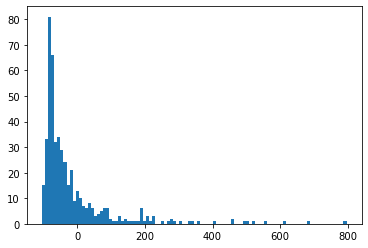

In [22]:
plt.hist(po_ana, bins=100)

In [23]:
po_sigmoid = np.exp(-po_ana/abs(np.min(po_ana))) / np.sum(np.exp(-po_ana/abs(np.min(po_ana))))

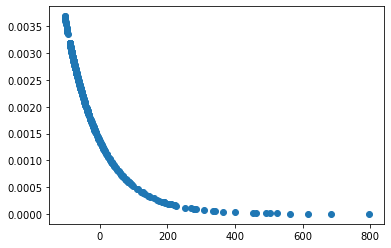

In [24]:
plt.scatter(po_ana, po_sigmoid)

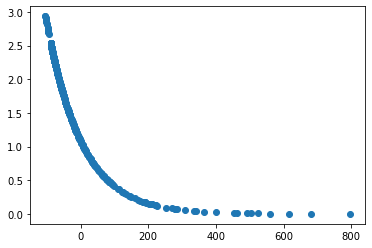

In [25]:
plt.scatter(po_ana, po_sigmoid*abs(po_ana.max()))

## Assign weight to each site

In [26]:
idx = 0
for i in range(sphere_sites.shape[0]):
    for j in range(len(sphere_sites[i])):
        sphere_sites[i][j].properties["weight"].append(po_sigmoid[idx])
        idx += 1

In [27]:
weights = np.array([np.sum(site.properties["weight"]) for site in un_cry.sites])

In [28]:
atom_lst = [site.specie.symbol for site in un_cry.sites]

In [29]:
def atom_label(list):
    ele = np.unique(np.array(list))
    list_label = list.copy()
    count = [0] * len(ele)
    for idx in range(len(list)):
        for idj in range(len(ele)):
            if list[idx] == ele[idj]:
                count[idj] += 1
                list_label[idx] = list[idx] + str(count[idj])
    return list_label

In [30]:
atom_lst_test = atom_label(atom_lst)

# Analysis

## Violinplot

In [31]:
key_weight = {}
for idx in range(len(weights)):
    if atom_lst[idx] not in key_weight:
        key_weight.update({atom_lst[idx]: weights[idx]})
    else:
        key_weight[atom_lst[idx]] = np.append(key_weight[atom_lst[idx]], weights[idx])

Text(0, 0.5, 'weight')

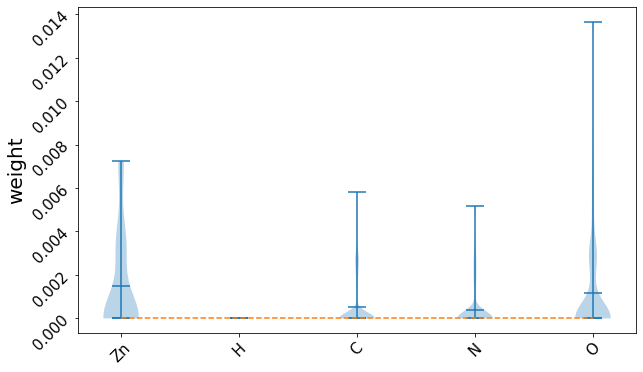

In [32]:
ele = [key for key in key_weight.keys()]
data = [key_weight[key] for key in key_weight.keys()]
pos = np.arange(len(ele))

fs = 15  # fontsize

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

axs.violinplot(data, pos, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
axs.plot([0,len(ele)-1], [0, 0], linestyle='dashed')
axs.set_xticks(np.arange(len(ele)))
axs.set_xticklabels(ele)
axs.tick_params(labelsize=fs, labelrotation=45)
axs.set_ylabel("weight", fontdict={"fontsize": 20})

## cif visualization

In [33]:
from ase_notebook import AseView, ViewConfig
import ase.io

In [34]:
ase_crys = ase.io.read("nvt_results/%s/%s.cif" %(structure, structure))

In [35]:
config = ViewConfig()
config.element_radii = "custom"
config.atom_font_size=12
config.axes_length=30
config.canvas_size=(900, 900)
config.zoom=1.5
config.show_bonds=True

In [36]:
ase_view = AseView(config, radii=weights*10)

radii defined


In [37]:
gui = ase_view.make_render(
    ase_crys, center_in_uc=True)
gui

yes


/home/xiaoqi/anaconda3/envs/ml/lib/python3.7/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


GridspecLayout(children=(Renderer(camera=PerspectiveCamera(fov=10.0, position=(0.0, 0.0, 691.4814299883975), p…

# Change weight order according to cif